In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import acquire_plays_data
import prep_plays
import wrangle_plays_data
import wrangle_players
import re
plt.rc("figure", figsize=(12, 7))
plt.rc("font", size=14)

Acquire.py Loaded Successfully
Prep.py Loaded Successfully
Prep.py Loaded Successfully
Wrangle.py Loaded Successfully


In [2]:
df = pd.read_csv('players.csv')

In [3]:
df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [4]:
df.describe()

,nflId,weight
count,1.303000e+03,1303.000000
mean,2.416518e+06,222.537222
std,5.333335e+05,29.476747
min,2.520000e+02,159.000000
25%,2.539662e+06,200.000000
50%,2.553658e+06,216.000000
75%,2.558184e+06,242.000000
max,2.561671e+06,352.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [6]:
df.height.value_counts()

73      159
72      153
74      141
75      136
71      127
76       90
70       81
77       67
6-2      42
69       37
78       37
6-0      33
5-10     32
6-1      29
5-11     27
6-3      25
6-4      25
68       18
6-5      11
79        9
5-9       9
80        3
67        3
6-7       2
6-6       2
66        2
5-8       1
5-7       1
5-6       1
Name: height, dtype: int64

In [7]:
example = '5-10'

In [8]:
feet = int(re.findall(r'(\d+)-(\d+)', example)[0][0])
feet

5

In [9]:
inches = int(re.findall(r'(\d+)-(\d+)', example)[0][1])
inches

10

### Converts the heights from feet-inches into inches

In [10]:
def conv_height(value):
    if len(re.findall(r'(\d+)-(\d+)', value)) > 0:
        feet = int(re.findall(r'(\d+)-(\d+)', value)[0][0])
        inches = int(re.findall(r'(\d+)-(\d+)', value)[0][1])
        return (feet * 12) + inches
    else:
        return value

In [11]:
df['height'] = df.height.apply(conv_height)

In [12]:
df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [13]:
df.birthDate.value_counts()

1989-04-26    4
1993-01-22    3
06/16/1988    3
1993-04-10    3
1993-02-08    3
             ..
1994-04-09    1
1990-03-05    1
1993-11-04    1
1995-03-02    1
1994-10-07    1
Name: birthDate, Length: 1150, dtype: int64

### Converting birthdate to datetime

In [14]:
df.birthDate = pd.to_datetime(df.birthDate)

In [15]:
# Creating a age column that takes the first date and subtracts the birthdate as a
df['age'] = (pd.to_datetime('09/06/2018') - df.birthDate).astype('<m8[Y]')

In [16]:
df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,27.0
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,29.0
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,26.0
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,23.0
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,25.0


In [17]:
def prep_players():
    '''
    This function acquires the players csv and prepares
    it to merge with other csv's
    '''
    # Acquire the players csv
    df= pd.read_csv('players.csv')
    # Convert the birthdate to datetime to get rid of different date formats
    df.birthDate = pd.to_datetime(df.birthDate)
    # Creating a age column that takes the start date of the 2018 season and subtracts the birthdate
    df['age'] = (pd.to_datetime('09/06/2018') - df.birthDate).astype('<m8[Y]')
    # Function that converts heights
    def conv_height(value):
        if len(re.findall(r'(\d+)-(\d+)', value)) > 0:
            feet = int(re.findall(r'(\d+)-(\d+)', value)[0][0])
            inches = int(re.findall(r'(\d+)-(\d+)', value)[0][1])
            return (feet * 12) + inches
        else:
            return value
    # Changing height column to equal just inches
    df['height'] = df.height.apply(conv_height)
    return df

In [18]:
df= prep_players()

In [19]:
df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,27.0
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,29.0
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,26.0
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,23.0
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,25.0


In [20]:
import prep_season

Prep_Season.py Loaded Successfully


In [21]:
df2 = prep_season.clean_season()

Dataframe Ready For Use


In [22]:
df2.head().T

,0,1,2,3,4
time,2018-09-07T01:07:19.700Z,2018-09-07T01:09:14.400Z,2018-09-07T01:09:55.200Z,2018-09-07T01:10:40.700Z,2018-09-07T01:12:42.000Z
x,96.1,54.77,55.38,56.59,18.59
y,27.82,29.86,27.42,25.89,25.33
s,0.99,0.86,0.86,2.66,2.19
a,1.14,1.16,0.04,1.92,0.98
dis,0.1,0.09,0.09,0.25,0.22
o,327.4,338.33,181.68,271.87,40.17
dir,311.41,58.53,180.92,304.04,54.47
pass_stopped,0,1,1,0,1
nflId,310,310,310,310,310


In [23]:
df2.describe()

,x,y,s,a,dis,o,dir,pass_stopped,nflId,jerseyNumber,frameId,gameId,playId,week,height,weight,age
count,238385.000000,238385.000000,238385.000000,238385.000000,238385.000000,238385.000000,238385.000000,238385.000000,2.383850e+05,238385.000000,238385.000000,2.383850e+05,238385.000000,238385.000000,238385.000000,238385.000000,238385.000000
mean,59.815673,26.716350,3.897622,2.374994,0.392532,181.105796,180.440949,0.372838,2.385183e+06,37.469312,52.089523,2.018107e+09,2171.329027,8.943436,73.015030,216.206561,26.018625
std,25.414093,12.764306,2.132900,1.319852,0.215808,105.377527,106.161408,0.483561,5.893665e+05,24.463060,12.981468,1.150260e+04,1242.869632,4.987260,2.369851,23.644772,3.480797
min,-3.460000,-9.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.520000e+02,1.000000,17.000000,2.018091e+09,50.000000,1.000000,66.000000,159.000000,20.000000
25%,41.630000,17.260000,2.150000,1.360000,0.220000,93.830000,91.980000,0.000000,2.533062e+06,20.000000,43.000000,2.018100e+09,1120.000000,4.000000,71.000000,196.000000,23.000000
50%,59.790000,26.680000,3.880000,2.230000,0.390000,179.930000,180.260000,0.000000,2.552430e+06,29.000000,50.000000,2.018110e+09,2162.000000,9.000000,73.000000,212.000000,25.000000
75%,77.890000,36.160000,5.480000,3.210000,0.550000,270.730000,269.700000,1.000000,2.557969e+06,53.000000,59.000000,2.018120e+09,3203.000000,13.000000,75.000000,235.000000,28.000000
max,123.600000,60.630000,10.910000,12.520000,2.990000,360.000000,360.000000,1.000000,2.561671e+06,99.000000,160.000000,2.018123e+09,5637.000000,17.000000,80.000000,350.000000,41.000000


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238385 entries, 0 to 238418
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           238385 non-null  object 
 1   x              238385 non-null  float64
 2   y              238385 non-null  float64
 3   s              238385 non-null  float64
 4   a              238385 non-null  float64
 5   dis            238385 non-null  float64
 6   o              238385 non-null  float64
 7   dir            238385 non-null  float64
 8   pass_stopped   238385 non-null  int64  
 9   nflId          238385 non-null  float64
 10  displayName    238385 non-null  object 
 11  jerseyNumber   238385 non-null  float64
 12  position       238385 non-null  object 
 13  frameId        238385 non-null  int64  
 14  team           238385 non-null  object 
 15  gameId         238385 non-null  int64  
 16  playId         238385 non-null  int64  
 17  playDirection  238385 non-nul

In [25]:
#df2.dropna(axis=0, inplace=True)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238385 entries, 0 to 238418
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           238385 non-null  object 
 1   x              238385 non-null  float64
 2   y              238385 non-null  float64
 3   s              238385 non-null  float64
 4   a              238385 non-null  float64
 5   dis            238385 non-null  float64
 6   o              238385 non-null  float64
 7   dir            238385 non-null  float64
 8   pass_stopped   238385 non-null  int64  
 9   nflId          238385 non-null  float64
 10  displayName    238385 non-null  object 
 11  jerseyNumber   238385 non-null  float64
 12  position       238385 non-null  object 
 13  frameId        238385 non-null  int64  
 14  team           238385 non-null  object 
 15  gameId         238385 non-null  int64  
 16  playId         238385 non-null  int64  
 17  playDirection  238385 non-nul

In [27]:
df2.pass_stopped.value_counts()

0    149506
1     88879
Name: pass_stopped, dtype: int64

In [28]:
df2.position.value_counts()

CB     48123
WR     47494
OLB    21087
TE     20445
FS     18438
QB     17428
RB     17330
SS     14364
ILB    12342
LB      7184
MLB     5881
DB      5123
S       1728
HB       595
FB       581
DE       143
DL        35
DT        28
LS        14
P         13
NT         6
K          3
Name: position, dtype: int64

In [29]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_players.explore_train_validate_test(df2)
X_train.T

,108616,88438,19928,48704,36889,122370,211668,179341,153906,178140,...,230695,66594,108268,7592,157,136507,237102,110248,45669,27901
time,2018-10-28T17:50:06.000Z,2018-11-25T19:27:12.000Z,2018-10-23T01:25:26.099Z,2018-10-01T02:32:39.700Z,2018-10-07T20:20:39.599Z,2018-09-23T22:26:14.000Z,2018-09-23T17:08:17.200Z,2018-11-20T03:10:20.000Z,2018-10-07T20:10:40.099Z,2018-10-07T18:12:26.900Z,...,2018-10-21T18:04:29.500Z,2018-12-09T20:00:03.599Z,2018-11-04T20:13:22.599Z,2018-10-28T14:34:01.200Z,2018-10-07T17:57:27.599Z,2018-11-16T04:02:15.799Z,2018-12-02T18:35:33.500Z,2018-09-09T22:54:42.000Z,2018-11-11T19:12:58.200Z,2018-09-16T17:42:51.500Z
x,73.01,80.89,24.21,64.39,71.72,50.38,29.97,50.11,108.27,3.33,...,63.22,45.25,103.2,31.33,72.36,72.57,46.1,108.82,18.78,31.06
y,23.54,14.65,23.26,25.96,24.24,19.23,33.16,6.2,8.99,30.68,...,7.46,25.79,35.18,14.8,29.38,20.32,32.72,16.34,22.04,21.47
s,5.19,6.12,0.42,2.53,4.31,2.43,5.16,4.54,2.53,0.85,...,5.81,2,5.26,5.03,2.09,1.63,6.74,4.38,3.32,2.88
a,1.39,1.79,0.84,2.15,2.89,1.41,3.27,3.52,2.87,2.07,...,2.9,1.51,2.32,2.33,1.91,1.7,2,3.55,1.15,2.39
dis,0.52,0.62,0.04,0.25,0.43,0.25,0.53,0.47,0.25,0.09,...,0.59,0.19,0.53,0.51,0.22,0.16,0.68,0.44,0.34,0.28
o,10.46,186.33,154.85,95.78,206.92,193.98,173.92,234.04,7.85,70.54,...,25.13,182.92,86.04,161.03,257.97,207.88,147.08,49.36,311.11,3.35
dir,344.82,178.5,129.22,113.63,168.8,135.62,335.23,212.26,44.49,239.25,...,97.43,135.34,138.22,188.97,19.04,87.28,91.01,34.04,311.35,331.83
pass_stopped,0,1,0,0,1,0,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
nflId,2.49519e+06,494259,2.54374e+06,2.54022e+06,382,2.55526e+06,2.55784e+06,2.55812e+06,2.55335e+06,2.54346e+06,...,2.55237e+06,2.55816e+06,2.49583e+06,2.54016e+06,310,2.55516e+06,2.55807e+06,2.53292e+06,2.54381e+06,2.50806e+06


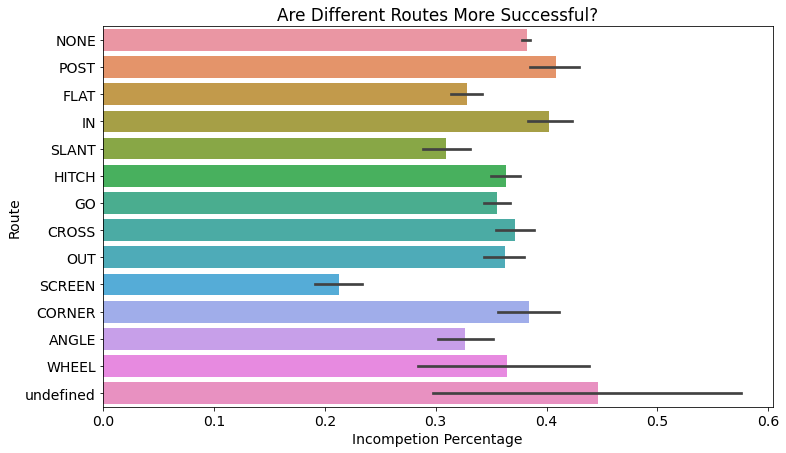

In [30]:
sns.barplot(data=X_train,x='pass_stopped', y='route')
plt.xlabel('Incompetion Percentage')
plt.ylabel('Route')
plt.title("Are Different Routes More Successful?")
plt.show()

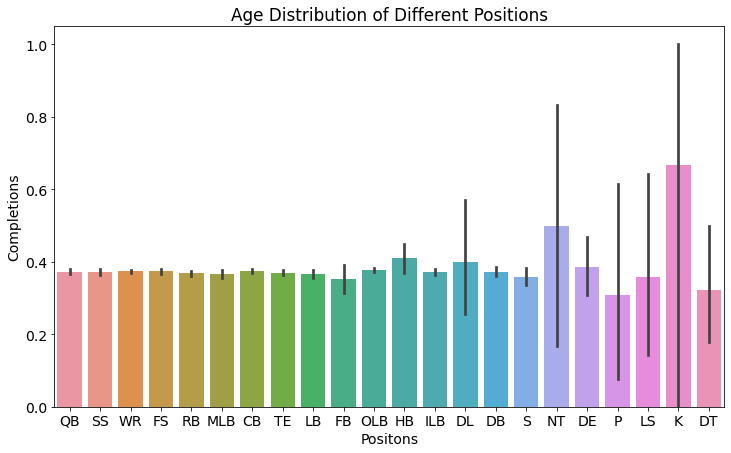

In [31]:
sns.barplot(data=df2,x='position', y='pass_stopped')
plt.xlabel('Positons')
plt.ylabel('Completions')
plt.title("Age Distribution of Different Positions")
plt.show()

In [32]:
df2.groupby(['position','team']).s.agg(['mean','count','min','max']).sort_values(by='mean',ascending =False)

,,mean,count,min,max
position,team,,,,
K,away,5.205000,2,4.16,6.25
S,home,4.489240,908,0.24,9.71
FS,home,4.442533,9107,0.01,9.98
DB,away,4.385442,2543,0.06,9.94
FS,away,4.377412,9331,0.06,9.79
DB,home,4.356888,2580,0.09,10.10
SS,home,4.340735,7168,0.03,10.06
FB,home,4.300903,299,0.26,8.25
WR,home,4.276686,23712,0.00,10.91


In [33]:
df2.groupby('team').s.agg(['mean','count','min','max']).sort_values(by='mean',ascending =False)

,mean,count,min,max
team,,,,
home,3.907434,119333,0.0,10.91
away,3.887786,119052,0.0,10.68
